# Practical 2 
### Describe the Distribution of Variable:
1. Obtain a dataset and calculate descriptive statistics (central tendencies, variance, etc)
2. Create a visualisation (histogram, box plots) to depict the distribution of a variable and analyze its characteristics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv(r"C:\Users\hp\Desktop\Lr_Tiwar_college\Datasets\OnlineRetail(ABA).csv", encoding= 'unicode_escape')
df = data.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
print("Median for `Quantity` and `UnitPrice`: ")
Mean_quantity_UnitPrice = df[['Quantity', 'UnitPrice']].median()
print(Mean_quantity_UnitPrice)

Median for `Quantity` and `UnitPrice`: 
Quantity     3.00
UnitPrice    2.08
dtype: float64


In [6]:
print('Mode for `Quantity` and `UnitPrice`: ')
Mode_Quantity = df[['Quantity', 'UnitPrice']].mode()
print(Mode_Quantity)

Mode for `Quantity` and `UnitPrice`: 
   Quantity  UnitPrice
0         1       1.25


In [7]:
print('Mode for `UnitPrice`: ')
Mode_UnitPrice = df['UnitPrice'].mode()
print(Mode_UnitPrice.values)

Mode for `UnitPrice`: 
[1.25]


In [8]:
print('Mean for `Quantity` and `UnitPrice`: ')
Mean_Quantity_UnitPrice = df[['Quantity','UnitPrice']].mean()
print(Mean_Quantity_UnitPrice)

Mean for `Quantity` and `UnitPrice`: 
Quantity     9.552250
UnitPrice    4.611114
dtype: float64


In [9]:
#Std and Variance
print('Standard Deviation for `Quantity` and `UnitPrice`: ')
Std_quantity_unitPrice = df[['Quantity', 'UnitPrice']].std()
print(Std_quantity_unitPrice)

Standard Deviation for `Quantity` and `UnitPrice`: 
Quantity     218.081158
UnitPrice     96.759853
dtype: float64


In [10]:
print('Variance for `Quantity` and `UnitPrice`: ')
var_quantity_unitPrice = df[['Quantity', 'UnitPrice']].var()
print(var_quantity_unitPrice)

Variance for `Quantity` and `UnitPrice`: 
Quantity     47559.391409
UnitPrice     9362.469164
dtype: float64


In [11]:
df_cleaned = df.dropna(subset = "CustomerID")

### For UnitPrice removing Outliers

In [27]:
lower_bound = df_cleaned['UnitPrice'].quantile(0.01)
upper_bound = df_cleaned['UnitPrice'].quantile(0.95)
filtered_data = df_cleaned[(df_cleaned["UnitPrice"] >= lower_bound) & (df_cleaned["UnitPrice"] < upper_bound)]

In [28]:
print(f"Main Data: {df_cleaned.shape}\nData with outliers removed: {filtered_data.shape}")

Main Data: (406829, 8)
Data with outliers removed: (379719, 8)


In [23]:
(379677/406829) * 100


93.32594284084959

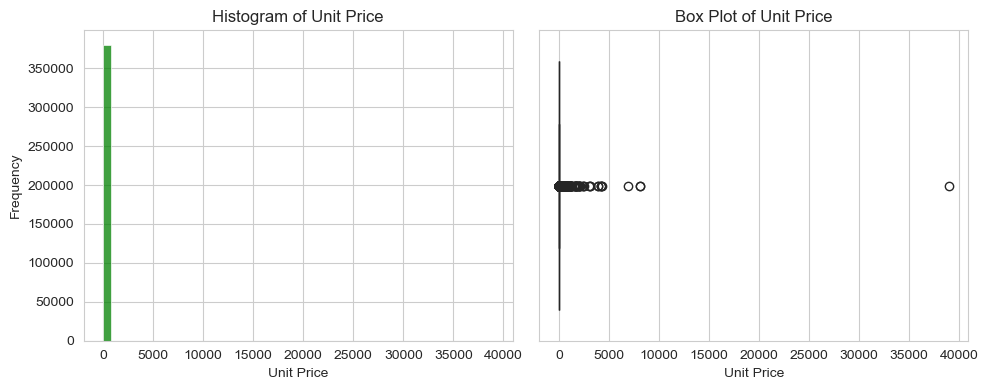

(None, None)

In [ ]:
plt.figure(figsize=(10, 4))
sns.set_style('whitegrid')

#histogram for 'Unit Price'
plt.subplot(1, 2, 1)
sns.histplot(filtered_data['UnitPrice'], bins=50, kde=False, color="green")
plt.title('Histogram of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

#box plot for unitprice
plt.subplot(1,2,2)
sns.boxplot(x=filtered_data['UnitPrice'], color='green')
plt.title('Box Plot of Unit Price')
plt.xlabel('Unit Price')

plt.tight_layout(), plt.show()

### For Quantity removing outliers

In [15]:
lower_bound = df_cleaned['Quantity'].quantile(0.01)
upper_bound = df_cleaned['Quantity'].quantile(0.95)
filtered_data = df_cleaned[(df_cleaned["Quantity"] >= lower_bound) & (df_cleaned["Quantity"] < upper_bound)]

In [16]:
print(f"Main Data: {df_cleaned.shape}\nData with outliers removed: {filtered_data.shape}")

Main Data: (406829, 8)
Data with outliers removed: (379719, 8)


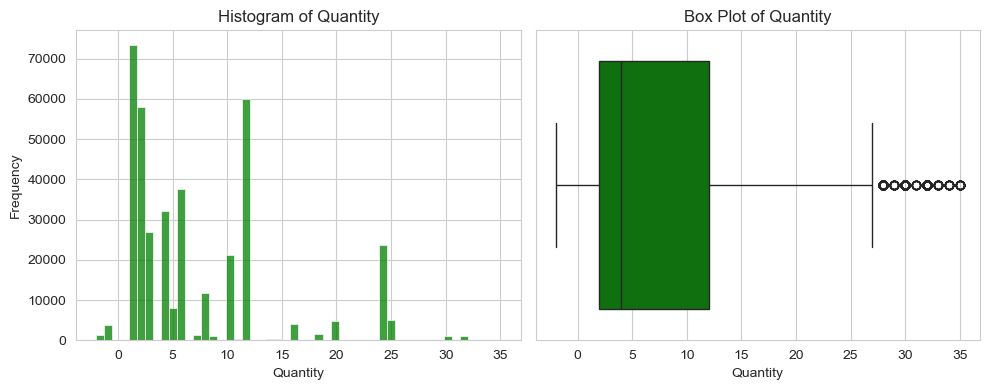

In [17]:
plt.figure(figsize=(10, 4))
sns.set_style('whitegrid')

#histogram for 'Quantity'
plt.subplot(1, 2, 1)
sns.histplot(filtered_data['Quantity'], bins=50, kde=False, color="green")
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

#box plot for Quantity
plt.subplot(1,2,2)
sns.boxplot(x=filtered_data['Quantity'], color='green')
plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')

plt.tight_layout()
plt.show()

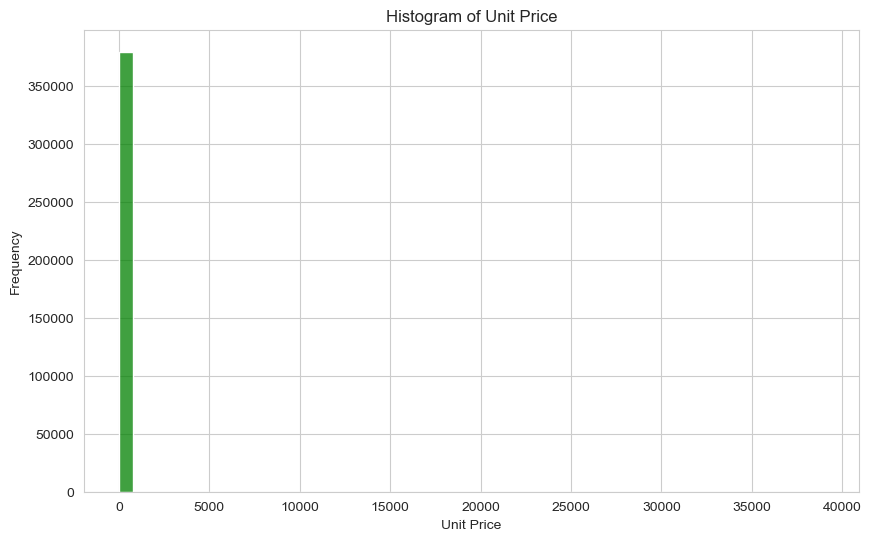

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['UnitPrice'], bins=50, kde=False, color="green")
plt.title('Histogram of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()